<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Lab: .loc, .iloc, alterações de dados

Referências e Materiais úteis para este Lab são as notas de aula e o  [Pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)



In [1]:
import pandas as pd
import numpy as np

## **CASE Ações B3**



## Instale o yahoo finance

In [2]:
%%capture
!pip install yfinance

## Extraia dos dados de alguns ativos

São aqui extraídos os dados taxa do dólar, ações da Petrobrás, Itaú e Vale em dólar, assim como o índice bovespa.

In [3]:
import yfinance as yf

df = yf.download(['^BVSP', 'PETR4.SA', 'ITUB4.SA', 'VALE3.SA', 'BRL=X'],'2023-01-01','2024-01-01')
df.head()

[*********************100%%**********************]  5 of 5 completed


Price      Adj Close                                                Close  \
Ticker         BRL=X   ITUB4.SA   PETR4.SA   VALE3.SA     ^BVSP     BRL=X   
Date                                                                        
2023-01-02  5.285500  22.463795  17.709478  80.482178  106376.0  5.285500   
2023-01-03  5.360131  21.995989  17.261332  80.338135  104166.0  5.360131   
2023-01-04  5.478500  22.060196  17.809923  80.482178  105334.0  5.478500   
2023-01-05  5.430100  22.748144  18.451235  81.832550  107518.0  5.430100   
2023-01-06  5.349800  23.142569  18.343063  83.128906  108836.0  5.349800   

Price                                                  ...      Open  \
Ticker       ITUB4.SA   PETR4.SA   VALE3.SA     ^BVSP  ...     BRL=X   
Date                                                   ...             
2023-01-02  24.490000  22.920000  89.400002  106376.0  ...  5.285500   
2023-01-03  23.980000  22.340000  89.239998  104166.0  ...  5.360131   
2023-01-04  24.049999  23.049999  89.400002  105334.0  ...  5.478500   
2023-01-05  24.799999  23.879999  90.900002  107518.0  ...  5.430100   
2023-01-06  25.230000  23.740000  92.339996  108836.0  ...  5.349800   

Price                                                 Volume              \
Ticker       ITUB4.SA   PETR4.SA   VALE3.SA     ^BVSP  BRL=X    ITUB4.SA   
Date                                                                       
2023-01-02  24.430000  23.540001  88.680000  109734.0      0  23340700.0   
2023-01-03  24.490000  22.940001  89.400002  106377.0      0  29873800.0   
2023-01-04  24.059999  21.959999  89.300003  104167.0      0  29881500.0   
2023-01-05  24.100000  23.340000  89.459999  105336.0      0  36322800.0   
2023-01-06  24.930000  23.940001  91.000000  107642.0      0  37628200.0   

Price                                            
Ticker         PETR4.SA    VALE3.SA       ^BVSP  
Date                                             
2023-01-02   78424700.0  12783800.0   8130500.0  
2023-01-03   96750300.0  25332600.0  14466700.0  
2023-01-04  129504000.0  26395300.0  14451200.0  
2023-01-05   73886000.0  29085600.0  15512000.0  
2023-01-06   51851500.0  31420600.0  12626600.0  

[5 rows x 30 columns]

# Q1.

Verifique os nomes das colunas. As colunas são um índice composto e hierárquico. Altere o df para conter apenas os valores de fechamento diário dos ativos (`Adj Close`).


In [4]:
df = df['Adj Close']
df

Ticker,BRL=X,ITUB4.SA,PETR4.SA,VALE3.SA,^BVSP
Date,,,,,
2023-01-02,5.285500,22.463795,17.709478,80.482178,106376.0
2023-01-03,5.360131,21.995989,17.261332,80.338135,104166.0
2023-01-04,5.478500,22.060196,17.809923,80.482178,105334.0
2023-01-05,5.430100,22.748144,18.451235,81.832550,107518.0
2023-01-06,5.349800,23.142569,18.343063,83.128906,108836.0
...,...,...,...,...,...
2023-12-25,4.869844,NaN,NaN,NaN,NaN
2023-12-26,4.869744,32.303120,37.330002,73.377686,133533.0
2023-12-27,4.813500,32.523911,37.360001,74.085999,134194.0


## Gabarito

In [5]:
print(df.columns)

Index(['BRL=X', 'ITUB4.SA', 'PETR4.SA', 'VALE3.SA', '^BVSP'], dtype='object', name='Ticker')


O resultado deve se parecer com:

In [6]:
df.columns[0:5]

Index(['BRL=X', 'ITUB4.SA', 'PETR4.SA', 'VALE3.SA', '^BVSP'], dtype='object', name='Ticker')

In [7]:
%%script echo skipping alternative solution
df = df[[('Adj Close',    'BRL=X'),
            ('Adj Close', 'ITUB4.SA'),
            ('Adj Close', 'PETR4.SA'),
            ('Adj Close', 'VALE3.SA'),
            ('Adj Close',    '^BVSP')]]

df.head()

skipping alternative solution


Qual a soma total dos valores desse novo df?

In [8]:
df.sum().sum()

28351377.40610838

# Q2.

Converta os valores cabíves para reais.

O resultado deve se parecer com:

In [9]:
for column in ['ITUB4.SA', 'PETR4.SA', 'VALE3.SA']:
  df[column] = df[column] * df['BRL=X']

df.head()

Ticker,BRL=X,ITUB4.SA,PETR4.SA,VALE3.SA,^BVSP
Date,,,,,
2023-01-02,5.285500,118.732388,93.603449,425.388554,106376.0
2023-01-03,5.360131,117.901377,92.522995,430.622910,104166.0
2023-01-04,5.478500,120.856781,97.571662,440.921602,105334.0
2023-01-05,5.430100,123.524697,100.192050,444.358927,107518.0
2023-01-06,5.349800,123.808116,98.131722,444.723032,108836.0


Qual o preço médio das ações no período?

In [10]:
df[['ITUB4.SA', 'PETR4.SA', 'VALE3.SA']].mean()

Ticker
ITUB4.SA    127.678873
PETR4.SA    132.653838
VALE3.SA    342.970196
dtype: float64

# Q3.

Existem valores nulos (ausentes) em algumas linhas. São datas em que não existem valores dos ativos, por exemplo, por feriado na bolsa de São Paulo.

Para quantos dias no período não há valores das ações?

**Dica:** você pode empregar `df.isnull()`, mas já apresentamos uma outra forma que você pode usar.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2023-01-02 to 2023-12-29
Freq: B
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BRL=X     260 non-null    float64
 1   ITUB4.SA  248 non-null    float64
 2   PETR4.SA  248 non-null    float64
 3   VALE3.SA  248 non-null    float64
 4   ^BVSP     248 non-null    float64
dtypes: float64(5)
memory usage: 12.2 KB


In [12]:
df.isnull().sum()

Ticker
BRL=X        0
ITUB4.SA    12
PETR4.SA    12
VALE3.SA    12
^BVSP       12
dtype: int64

# Q4.

Qual ativo rendeu mais no período? Você pode calcular o percentual de aumento ou descréscimo do ativo do início ao fim do período.

In [13]:
df.columns

Index(['BRL=X', 'ITUB4.SA', 'PETR4.SA', 'VALE3.SA', '^BVSP'], dtype='object', name='Ticker')

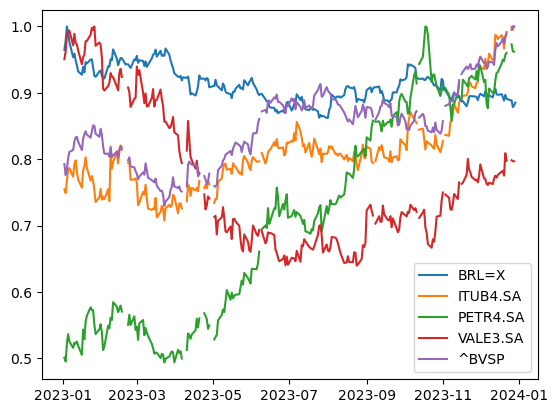

In [14]:
import matplotlib.pyplot as plt

plt.plot(df[['BRL=X', 'ITUB4.SA', 'PETR4.SA', 'VALE3.SA', '^BVSP']] / df[['BRL=X', 'ITUB4.SA', 'PETR4.SA', 'VALE3.SA', '^BVSP']].max(),
         label=['BRL=X', 'ITUB4.SA', 'PETR4.SA', 'VALE3.SA', '^BVSP'])

plt.legend()
plt.show()

In [15]:
df.head()

Ticker,BRL=X,ITUB4.SA,PETR4.SA,VALE3.SA,^BVSP
Date,,,,,
2023-01-02,5.285500,118.732388,93.603449,425.388554,106376.0
2023-01-03,5.360131,117.901377,92.522995,430.622910,104166.0
2023-01-04,5.478500,120.856781,97.571662,440.921602,105334.0
2023-01-05,5.430100,123.524697,100.192050,444.358927,107518.0
2023-01-06,5.349800,123.808116,98.131722,444.723032,108836.0


In [16]:
df.tail()

Ticker,BRL=X,ITUB4.SA,PETR4.SA,VALE3.SA,^BVSP
Date,,,,,
2023-12-25,4.869844,NaN,NaN,NaN,NaN
2023-12-26,4.869744,157.307917,181.787546,357.330531,133533.0
2023-12-27,4.813500,156.553841,179.832360,356.612949,134194.0
2023-12-28,4.826100,157.380611,179.723967,356.622498,134185.0
2023-12-29,4.850200,NaN,NaN,NaN,NaN


In [17]:
df.iloc[0]

Ticker
BRL=X            5.285500
ITUB4.SA       118.732388
PETR4.SA        93.603449
VALE3.SA       425.388554
^BVSP       106376.000000
Name: 2023-01-02 00:00:00, dtype: float64

In [18]:
df.iloc[-2]

Ticker
BRL=X            4.826100
ITUB4.SA       157.380611
PETR4.SA       179.723967
VALE3.SA       356.622498
^BVSP       134185.000000
Name: 2023-12-28 00:00:00, dtype: float64

In [19]:
( df.iloc[-2] - df.iloc[0] ) / df.iloc[0]

Ticker
BRL=X      -0.086917
ITUB4.SA    0.325507
PETR4.SA    0.920057
VALE3.SA   -0.161655
^BVSP       0.261422
dtype: float64

In [20]:
df.head(1)

Ticker,BRL=X,ITUB4.SA,PETR4.SA,VALE3.SA,^BVSP
Date,,,,,
2023-01-02,5.2855,118.732388,93.603449,425.388554,106376.0


In [21]:
df.tail(2)

Ticker,BRL=X,ITUB4.SA,PETR4.SA,VALE3.SA,^BVSP
Date,,,,,
2023-12-28,4.8261,157.380611,179.723967,356.622498,134185.0
2023-12-29,4.8502,NaN,NaN,NaN,NaN


# Q5.

Substituindo nulos. Substitua os valores nulos pelos valores do dia anterior não nulo. Qual a soma de todos os valores do dataframe alterado?

**Dica:** empregue `np.isnan(float('nan'))` para verificar se um valor é nulo.

In [22]:
df['PETR4.SA'].isnull()

Date
2023-01-02    False
2023-01-03    False
2023-01-04    False
2023-01-05    False
2023-01-06    False
              ...  
2023-12-25     True
2023-12-26    False
2023-12-27    False
2023-12-28    False
2023-12-29     True
Freq: B, Name: PETR4.SA, Length: 260, dtype: bool

In [23]:
df[ df['PETR4.SA'].isnull() ].head()

Ticker,BRL=X,ITUB4.SA,PETR4.SA,VALE3.SA,^BVSP
Date,,,,,
2023-02-20,5.165169,NaN,NaN,NaN,NaN
2023-02-21,5.166700,NaN,NaN,NaN,NaN
2023-04-07,5.058300,NaN,NaN,NaN,NaN
2023-04-21,5.047700,NaN,NaN,NaN,NaN
2023-05-01,4.986000,NaN,NaN,NaN,NaN


In [24]:
ix_nulos = df[ df['PETR4.SA'].isnull() ].index

In [25]:
ix_nulos

DatetimeIndex(['2023-02-20', '2023-02-21', '2023-04-07', '2023-04-21',
               '2023-05-01', '2023-06-08', '2023-09-07', '2023-10-12',
               '2023-11-02', '2023-11-15', '2023-12-25', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [26]:
for line in range(0,len(df)):
  for column in range(0,df.shape[1]):
    if np.isnan( df.iloc[line, column] ):
      df.iloc[line, column] = df.iloc[line-1, column]


In [27]:
df.loc[ ix_nulos ]

Ticker,BRL=X,ITUB4.SA,PETR4.SA,VALE3.SA,^BVSP
Date,,,,,
2023-02-20,5.165169,128.715387,106.575359,413.425327,109303.0
2023-02-21,5.166700,128.715387,106.575359,413.425327,109303.0
2023-04-07,5.058300,114.225626,93.335439,355.401382,100822.0
2023-04-21,5.047700,120.772406,104.644358,348.546466,104367.0
2023-05-01,4.986000,119.918025,102.649029,331.461351,104432.0
2023-06-08,4.922400,125.390448,123.428039,310.328649,115488.0
2023-09-07,4.977000,124.975095,160.278294,320.049997,115985.0
2023-10-12,5.049600,134.442261,170.779061,322.466272,117051.0
2023-11-02,4.953700,130.247055,170.207654,335.510064,115053.0


In [28]:
df.sum().sum()

29860560.73985267

# Q6.

Um bom indicador empregado no  mercado é a quantidade de subidas e descidas que um ativo apresenta de um dia para outro (up & down) ao longo  de um período. Quais ativos tiveram mais dias de *up*?

## Aqui uma solução usando o `.loc`, uma vez que na anterior empregamos o `.iloc`

In [29]:
df = df.reset_index(drop=True)
df.head()

Ticker,BRL=X,ITUB4.SA,PETR4.SA,VALE3.SA,^BVSP
0,5.285500,118.732388,93.603449,425.388554,106376.0
1,5.360131,117.901377,92.522995,430.622910,104166.0
2,5.478500,120.856781,97.571662,440.921602,105334.0
3,5.430100,123.524697,100.192050,444.358927,107518.0
4,5.349800,123.808116,98.131722,444.723032,108836.0


In [30]:
df.columns

Index(['BRL=X', 'ITUB4.SA', 'PETR4.SA', 'VALE3.SA', '^BVSP'], dtype='object', name='Ticker')

In [31]:
for column in ['BRL=X', 'ITUB4.SA', 'PETR4.SA', 'VALE3.SA', '^BVSP']:
  df[column + '_up'] = False

for line in df.index[1::]: # salta o primeiro
  for column in ['BRL=X', 'ITUB4.SA', 'PETR4.SA', 'VALE3.SA', '^BVSP']: # salta up
    if df.loc[line,column] > df.loc[line-1,column]:
      df.loc[line,column + '_up'] = True

df.head()

Ticker,BRL=X,ITUB4.SA,PETR4.SA,VALE3.SA,^BVSP,BRL=X_up,ITUB4.SA_up,PETR4.SA_up,VALE3.SA_up,^BVSP_up
0,5.285500,118.732388,93.603449,425.388554,106376.0,False,False,False,False,False
1,5.360131,117.901377,92.522995,430.622910,104166.0,True,False,False,True,False
2,5.478500,120.856781,97.571662,440.921602,105334.0,True,True,True,True,True
3,5.430100,123.524697,100.192050,444.358927,107518.0,False,True,True,True,True
4,5.349800,123.808116,98.131722,444.723032,108836.0,False,True,False,True,True


In [32]:
[x for x in df.columns if '_up' in x]

['BRL=X_up', 'ITUB4.SA_up', 'PETR4.SA_up', 'VALE3.SA_up', '^BVSP_up']

In [33]:
df[[x for x in df.columns if '_up' in x]].mean()

Ticker
BRL=X_up       0.453846
ITUB4.SA_up    0.496154
PETR4.SA_up    0.519231
VALE3.SA_up    0.430769
^BVSP_up       0.480769
dtype: float64

## Solução alternativa

In [34]:
df_selected = df[['BRL=X', 'ITUB4.SA', 'PETR4.SA', 'VALE3.SA', '^BVSP']]
df_selected_shift = df_selected.shift() # df[i] = df[i-1], avança
( df_selected - df_selected_shift > 0 ).mean()

Ticker
BRL=X       0.453846
ITUB4.SA    0.496154
PETR4.SA    0.519231
VALE3.SA    0.430769
^BVSP       0.480769
dtype: float64

In [35]:
display(df_selected.head())
display(df_selected_shift.head())

Ticker,BRL=X,ITUB4.SA,PETR4.SA,VALE3.SA,^BVSP
0,5.285500,118.732388,93.603449,425.388554,106376.0
1,5.360131,117.901377,92.522995,430.622910,104166.0
2,5.478500,120.856781,97.571662,440.921602,105334.0
3,5.430100,123.524697,100.192050,444.358927,107518.0
4,5.349800,123.808116,98.131722,444.723032,108836.0


Ticker,BRL=X,ITUB4.SA,PETR4.SA,VALE3.SA,^BVSP
0,NaN,NaN,NaN,NaN,NaN
1,5.285500,118.732388,93.603449,425.388554,106376.0
2,5.360131,117.901377,92.522995,430.622910,104166.0
3,5.478500,120.856781,97.571662,440.921602,105334.0
4,5.430100,123.524697,100.192050,444.358927,107518.0


# Q7. Extra (Resolvido)

Crie uma coluna chamada `carteira` que é composta pelos valores das ações 'ITUB4.SA' e 'PETR4.SA', sendo 0.7 da ação de maior valor e 0.3 da ação de menor ou igual valor.

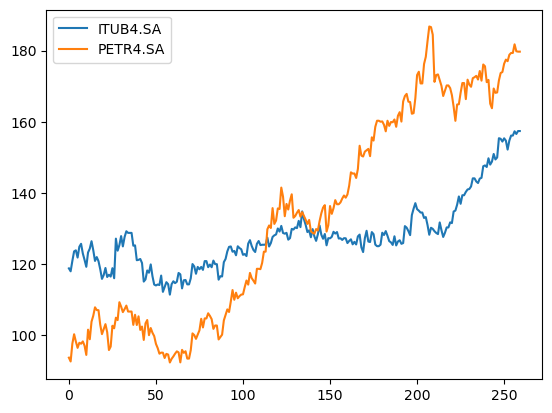

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df[['ITUB4.SA', 'PETR4.SA']],label=['ITUB4.SA', 'PETR4.SA'])
plt.legend()
plt.show()

O código abaixo exibe a "ideia" da atribuição dos valores. Mas o *slicing* dos dados não efetiva a transformação.

In [37]:
%%script echo 'skipping error'
df['carteira'] = 0

df[ df['ITUB4.SA'] > df['PETR4.SA'] ]['carteira'] = 0.7 * df[ df['ITUB4.SA'] > df['PETR4.SA'] ]['ITUB4.SA'] + 0.3 * df[ df['ITUB4.SA'] > df['PETR4.SA'] ]['PETR4.SA']
df[ df['ITUB4.SA'] <= df['PETR4.SA'] ]['carteira'] = 0.3 * df[ df['ITUB4.SA'] <= df['PETR4.SA'] ]['ITUB4.SA'] + 0.7 * df[ df['ITUB4.SA'] <= df['PETR4.SA'] ]['PETR4.SA']

print('After ', df['carteira'].sum() )

skipping error


In [38]:
%%script echo 'skipping error'
df['carteira'] = 0

df[ df['ITUB4.SA'] > df['PETR4.SA'] ][['carteira']] = 1

print('After ', df['carteira'].sum() )

skipping error


## Usando o `.loc` (ou `.iloc`)

In [39]:
df['carteira'] = 0

df.loc[ df['ITUB4.SA'] > df['PETR4.SA'],'carteira'] = 1

print('After ', df['carteira'].sum() )

After  116


## Cuidado o `.loc` (ou `.iloc`)

Acima é a forma correta!

In [40]:
%%script echo 'skipping error'
df['carteira'] = 0

df.loc[ df['ITUB4.SA'] > df['PETR4.SA']][['carteira']] = 1

print('After ', df['carteira'].sum() )

skipping error


Podemos agora efetivar a atribuição correta,



In [41]:
df.columns.to_list().index('carteira')

10

In [42]:
df['carteira'] = 0

df.iloc[ df['ITUB4.SA'] > df['PETR4.SA'], 10] = 0.7 * df[ df['ITUB4.SA'] > df['PETR4.SA'] ]['ITUB4.SA'] + 0.3 * df[ df['ITUB4.SA'] > df['PETR4.SA'] ]['PETR4.SA']
df.loc[ df['ITUB4.SA'] <= df['PETR4.SA'], 'carteira'] = 0.3 * df[ df['ITUB4.SA'] <= df['PETR4.SA'] ]['ITUB4.SA'] + 0.7 * df[ df['ITUB4.SA'] <= df['PETR4.SA'] ]['PETR4.SA']

print('After ', df['carteira'].sum() )


After  34957.90046078089


E um modo talvez mais elegante seja empregar um vetor de *seleção*,

In [43]:
df['carteira'] = 0
selection = df['ITUB4.SA'] > df['PETR4.SA']

df.iloc[ selection, 10] = 0.7 * df[ selection ]['ITUB4.SA'] + 0.3 * df[ selection ]['PETR4.SA']
df.loc[ ~selection, 'carteira'] = 0.3 * df[ ~selection ]['ITUB4.SA'] + 0.7 * df[ ~selection ]['PETR4.SA']

print('After ', df['carteira'].sum() )

After  34957.90046078089


In [44]:
df.iloc[ selection.index ].head()
# df.iloc[ selection ].head() # prefira a sintaxe acima

Ticker,BRL=X,ITUB4.SA,PETR4.SA,VALE3.SA,^BVSP,BRL=X_up,ITUB4.SA_up,PETR4.SA_up,VALE3.SA_up,^BVSP_up,carteira
0,5.285500,118.732388,93.603449,425.388554,106376.0,False,False,False,False,False,111.193706
1,5.360131,117.901377,92.522995,430.622910,104166.0,True,False,False,True,False,110.287862
2,5.478500,120.856781,97.571662,440.921602,105334.0,True,True,True,True,True,113.871245
3,5.430100,123.524697,100.192050,444.358927,107518.0,False,True,True,True,True,116.524903
4,5.349800,123.808116,98.131722,444.723032,108836.0,False,True,False,True,True,116.105198


In [45]:
df.loc[ selection ].head()

Ticker,BRL=X,ITUB4.SA,PETR4.SA,VALE3.SA,^BVSP,BRL=X_up,ITUB4.SA_up,PETR4.SA_up,VALE3.SA_up,^BVSP_up,carteira
0,5.285500,118.732388,93.603449,425.388554,106376.0,False,False,False,False,False,111.193706
1,5.360131,117.901377,92.522995,430.622910,104166.0,True,False,False,True,False,110.287862
2,5.478500,120.856781,97.571662,440.921602,105334.0,True,True,True,True,True,113.871245
3,5.430100,123.524697,100.192050,444.358927,107518.0,False,True,True,True,True,116.524903
4,5.349800,123.808116,98.131722,444.723032,108836.0,False,True,False,True,True,116.105198


# **Concluindo**

* Seleção (`read-only`), empregue

>> `df[ row-selection-criteria ][ columns-selection-list ]`

* Alteração de linhas (`update`) por chave inteira ou rótulo do índice, empregue

>> `df.iloc[ rows-position, column-position ]...`, ou

>> `df.loc[ rows-key, column-key (name) ]...`

* Alteração de linhas (`update`) por seleção de dados, empregue

>> `df.loc[ row-selection-criteria, column-key (name) ]...` (*preferencialmente*), ou

>> `df.iloc[ row-selection-criteria.index, column-position ]...`

